In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df=pd.read_csv('falldeteciton.csv')

In [3]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [4]:
df.ACTIVITY.value_counts()

0    4608
3    3588
4    3494
2    2502
5    1688
1     502
Name: ACTIVITY, dtype: int64

In [5]:
df1=df.drop('TIME',axis=1)

In [6]:
df1.head()

,ACTIVITY,SL,EEG,BP,HR,CIRCLUATION
0,3,4019.64,-1600.00,13,79,317
1,2,2191.03,-1146.08,20,54,165
2,2,2787.99,-1263.38,46,67,224
3,4,9545.98,-2848.93,26,138,554
4,4,14148.80,-2381.15,85,120,809


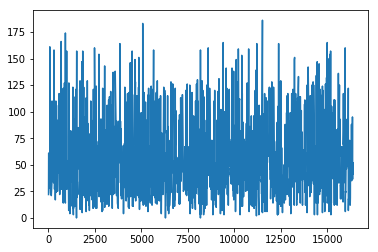

In [15]:
df1[df1['ACTIVITY']==5].BP.plot()

In [31]:
from sklearn.utils import resample,class_weight,random

In [34]:
df1.sample(n=100).ACTIVITY.value_counts()

0    31
3    23
4    18
2    14
5    11
1     3
Name: ACTIVITY, dtype: int64

In [36]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
plt.rcParams["figure.figsize"] = [16, 12]

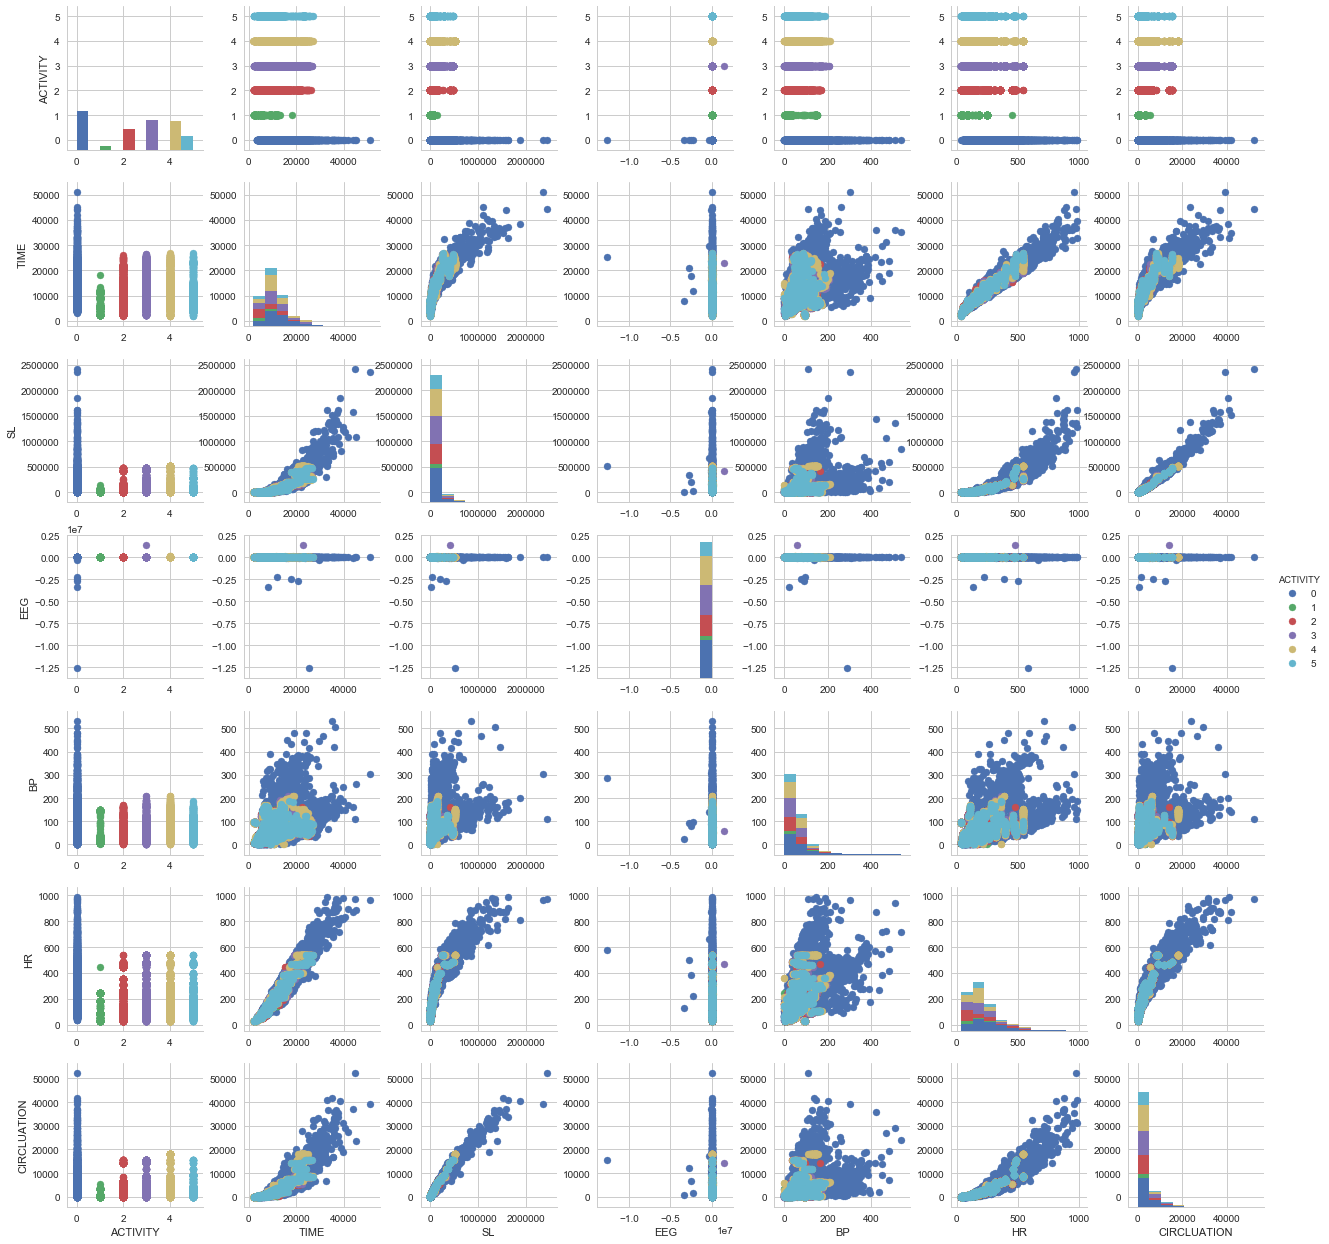

In [37]:
g = sns.PairGrid(df, hue="ACTIVITY")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()


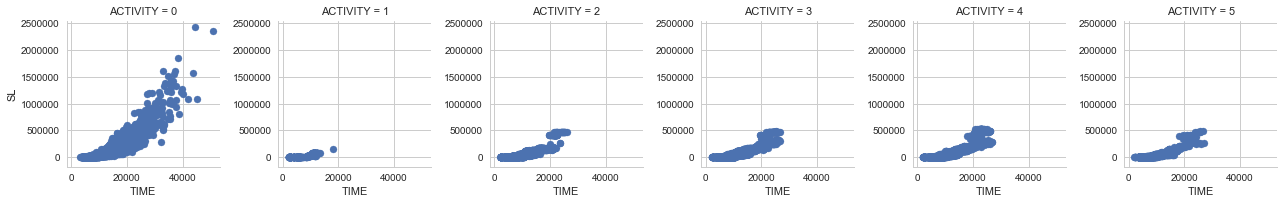

In [39]:
g = sns.FacetGrid(df, col="ACTIVITY") 
g.map(plt.scatter, "TIME", "SL")

In [40]:
df1.head()

,ACTIVITY,SL,EEG,BP,HR,CIRCLUATION
0,3,4019.64,-1600.00,13,79,317
1,2,2191.03,-1146.08,20,54,165
2,2,2787.99,-1263.38,46,67,224
3,4,9545.98,-2848.93,26,138,554
4,4,14148.80,-2381.15,85,120,809


In [41]:
df1.ACTIVITY.value_counts()

0    4608
3    3588
4    3494
2    2502
5    1688
1     502
Name: ACTIVITY, dtype: int64

In [42]:
df2=df1[df1['ACTIVITY']!=1]


In [43]:
df2.head()

,ACTIVITY,SL,EEG,BP,HR,CIRCLUATION
0,3,4019.64,-1600.00,13,79,317
1,2,2191.03,-1146.08,20,54,165
2,2,2787.99,-1263.38,46,67,224
3,4,9545.98,-2848.93,26,138,554
4,4,14148.80,-2381.15,85,120,809


In [44]:
import sklearn.utils.class_weight

In [49]:
class_weight.compute_sample_weight(class_weight='balanced',y=df1).shape

(16382,)

In [50]:
df1.shape

(16382, 6)

In [51]:
df2.shape

(15880, 6)

In [68]:
X=df1.iloc[:,1:6].values

In [69]:
y=df1.ACTIVITY.values

In [70]:
from keras.utils import to_categorical

In [71]:
y=to_categorical(y)

In [72]:
y

array([[ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.]])

In [73]:
y.sum(axis=0)

array([ 4608.,   502.,  2502.,  3588.,  3494.,  1688.])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [76]:
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.models import Sequential

In [77]:
X_train[0].shape

(5,)

In [78]:
inputshape=X_train[0].shape

In [79]:
X_train.shape

(11467, 5)

In [80]:
X_test.shape

(4915, 5)

In [81]:
y_train.shape

(11467, 6)

In [82]:
model=Sequential()

In [83]:
model.add(Dense(512,activation='relu',input_shape=inputshape))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

In [84]:
model.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [87]:
model.fit(X_train,y_train,batch_size=11467,epochs=500,validation_data=(X_test,y_test))

Train on 11467 samples, validate on 4915 samples
Epoch 1/500
11467/11467 [==============================] - 1s 59us/step - loss: 12.5775 - acc: 0.2157 - val_loss: 12.4563 - val_acc: 0.2214
Epoch 2/500
11467/11467 [==============================] - 1s 61us/step - loss: 12.5722 - acc: 0.2151 - val_loss: 12.4574 - val_acc: 0.2214
Epoch 3/500
11467/11467 [==============================] - 1s 60us/step - loss: 12.5762 - acc: 0.2155 - val_loss: 12.4574 - val_acc: 0.2212
Epoch 4/500
11467/11467 [==============================] - 1s 60us/step - loss: 12.5682 - acc: 0.2158 - val_loss: 12.4562 - val_acc: 0.2210
Epoch 5/500
11467/11467 [==============================] - 1s 59us/step - loss: 12.5574 - acc: 0.2162 - val_loss: 12.4525 - val_acc: 0.2193
Epoch 6/500
11467/11467 [==============================] - 1s 61us/step - loss: 12.5392 - acc: 0.2171 - val_loss: 12.4497 - val_acc: 0.2193
Epoch 7/500
11467/11467 [==============================] - 1s 61us/step - loss: 12.5388 - acc: 0.2165 - val_los

Epoch 59/500
11467/11467 [==============================] - 1s 64us/step - loss: 12.4897 - acc: 0.2151 - val_loss: 12.3980 - val_acc: 0.2187
Epoch 60/500
11467/11467 [==============================] - 1s 62us/step - loss: 12.4804 - acc: 0.2152 - val_loss: 12.3975 - val_acc: 0.2187
Epoch 61/500
11467/11467 [==============================] - 1s 62us/step - loss: 12.4847 - acc: 0.2145 - val_loss: 12.3914 - val_acc: 0.2187
Epoch 62/500
11467/11467 [==============================] - 1s 60us/step - loss: 12.4751 - acc: 0.2152 - val_loss: 12.3893 - val_acc: 0.2187
Epoch 63/500
11467/11467 [==============================] - 1s 60us/step - loss: 12.4728 - acc: 0.2146 - val_loss: 12.3754 - val_acc: 0.2187
Epoch 64/500
11467/11467 [==============================] - 1s 60us/step - loss: 12.4646 - acc: 0.2151 - val_loss: 12.3325 - val_acc: 0.2181
Epoch 65/500
11467/11467 [==============================] - 1s 63us/step - loss: 12.4385 - acc: 0.2153 - val_loss: 12.2997 - val_acc: 0.2181
Epoch 66/500


Epoch 118/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7775 - acc: 0.2164 - val_loss: 1.7774 - val_acc: 0.2252
Epoch 119/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7762 - acc: 0.2164 - val_loss: 1.7768 - val_acc: 0.2252
Epoch 120/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7811 - acc: 0.2163 - val_loss: 1.7762 - val_acc: 0.2252
Epoch 121/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7780 - acc: 0.2164 - val_loss: 1.7755 - val_acc: 0.2252
Epoch 122/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7798 - acc: 0.2163 - val_loss: 1.7749 - val_acc: 0.2252
Epoch 123/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7793 - acc: 0.2163 - val_loss: 1.7743 - val_acc: 0.2252
Epoch 124/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7783 - acc: 0.2164 - val_loss: 1.7737 - val_acc: 0.2252
Epoch 125/500
11467/

Epoch 177/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7489 - acc: 0.2164 - val_loss: 1.7496 - val_acc: 0.2252
Epoch 178/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7475 - acc: 0.2164 - val_loss: 1.7493 - val_acc: 0.2252
Epoch 179/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7519 - acc: 0.2164 - val_loss: 1.7489 - val_acc: 0.2252
Epoch 180/500
11467/11467 [==============================] - 1s 63us/step - loss: 1.7487 - acc: 0.2162 - val_loss: 1.7486 - val_acc: 0.2252
Epoch 181/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7488 - acc: 0.2164 - val_loss: 1.7482 - val_acc: 0.2252
Epoch 182/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7484 - acc: 0.2163 - val_loss: 1.7479 - val_acc: 0.2252
Epoch 183/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7468 - acc: 0.2164 - val_loss: 1.7476 - val_acc: 0.2252
Epoch 184/500
11467/

Epoch 236/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7288 - acc: 0.2164 - val_loss: 1.7325 - val_acc: 0.2252
Epoch 237/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7275 - acc: 0.2164 - val_loss: 1.7322 - val_acc: 0.2252
Epoch 238/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7297 - acc: 0.2163 - val_loss: 1.7320 - val_acc: 0.2252
Epoch 239/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7268 - acc: 0.2164 - val_loss: 1.7317 - val_acc: 0.2252
Epoch 240/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7305 - acc: 0.2163 - val_loss: 1.7315 - val_acc: 0.2252
Epoch 241/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7266 - acc: 0.2164 - val_loss: 1.7313 - val_acc: 0.2252
Epoch 242/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7274 - acc: 0.2163 - val_loss: 1.7310 - val_acc: 0.2252
Epoch 243/500
11467/

Epoch 295/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7138 - acc: 0.2164 - val_loss: 1.7201 - val_acc: 0.2252
Epoch 296/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7150 - acc: 0.2164 - val_loss: 1.7199 - val_acc: 0.2252
Epoch 297/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7134 - acc: 0.2164 - val_loss: 1.7197 - val_acc: 0.2252
Epoch 298/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7133 - acc: 0.2164 - val_loss: 1.7196 - val_acc: 0.2252
Epoch 299/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7142 - acc: 0.2164 - val_loss: 1.7194 - val_acc: 0.2252
Epoch 300/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.7129 - acc: 0.2164 - val_loss: 1.7192 - val_acc: 0.2252
Epoch 301/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7127 - acc: 0.2164 - val_loss: 1.7190 - val_acc: 0.2252
Epoch 302/500
11467/

Epoch 354/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7031 - acc: 0.2881 - val_loss: 1.7106 - val_acc: 0.2653
Epoch 355/500
11467/11467 [==============================] - 1s 63us/step - loss: 1.7029 - acc: 0.2881 - val_loss: 1.7104 - val_acc: 0.2653
Epoch 356/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7052 - acc: 0.2881 - val_loss: 1.7103 - val_acc: 0.2653
Epoch 357/500
11467/11467 [==============================] - 1s 63us/step - loss: 1.7037 - acc: 0.2882 - val_loss: 1.7101 - val_acc: 0.2653
Epoch 358/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.7029 - acc: 0.2880 - val_loss: 1.7100 - val_acc: 0.2653
Epoch 359/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7023 - acc: 0.2881 - val_loss: 1.7099 - val_acc: 0.2653
Epoch 360/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.7020 - acc: 0.2882 - val_loss: 1.7097 - val_acc: 0.2653
Epoch 361/500
11467/

Epoch 413/500
11467/11467 [==============================] - 1s 60us/step - loss: 1.6943 - acc: 0.2881 - val_loss: 1.7029 - val_acc: 0.2653
Epoch 414/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.6942 - acc: 0.2881 - val_loss: 1.7028 - val_acc: 0.2653
Epoch 415/500
11467/11467 [==============================] - 1s 65us/step - loss: 1.6940 - acc: 0.2881 - val_loss: 1.7027 - val_acc: 0.2653
Epoch 416/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.6952 - acc: 0.2880 - val_loss: 1.7026 - val_acc: 0.2653
Epoch 417/500
11467/11467 [==============================] - 1s 64us/step - loss: 1.6938 - acc: 0.2881 - val_loss: 1.7025 - val_acc: 0.2653
Epoch 418/500
11467/11467 [==============================] - 1s 64us/step - loss: 1.6937 - acc: 0.2881 - val_loss: 1.7024 - val_acc: 0.2653
Epoch 419/500
11467/11467 [==============================] - 1s 63us/step - loss: 1.6935 - acc: 0.2881 - val_loss: 1.7023 - val_acc: 0.2653
Epoch 420/500
11467/

Epoch 472/500
11467/11467 [==============================] - 1s 63us/step - loss: 1.6870 - acc: 0.2881 - val_loss: 1.6967 - val_acc: 0.2653
Epoch 473/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.6881 - acc: 0.2881 - val_loss: 1.6966 - val_acc: 0.2653
Epoch 474/500
11467/11467 [==============================] - 1s 62us/step - loss: 1.6868 - acc: 0.2881 - val_loss: 1.6965 - val_acc: 0.2653
Epoch 475/500
11467/11467 [==============================] - 1s 64us/step - loss: 1.6867 - acc: 0.2881 - val_loss: 1.6964 - val_acc: 0.2653
Epoch 476/500
11467/11467 [==============================] - 1s 63us/step - loss: 1.6864 - acc: 0.2882 - val_loss: 1.6963 - val_acc: 0.2653
Epoch 477/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.6878 - acc: 0.2881 - val_loss: 1.6962 - val_acc: 0.2653
Epoch 478/500
11467/11467 [==============================] - 1s 61us/step - loss: 1.6864 - acc: 0.2881 - val_loss: 1.6961 - val_acc: 0.2653
Epoch 479/500
11467/